# Written Exam Social Data Science Summer 2023
# Advanced Social Data Science I

Step 0: We import all necessary libaries. We use "import from" for libaries or modules if we use only a specific part of the module and use this specific part many times to avoid rephrasing the name and make the code more efficient.

In [51]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt


## PART 1 – SUPERVISED LEARNING

Step 1: We first load the csv dataset into a pandas dataframe and check the dataframe for datatypes, columns and potential missing values.

In [81]:
lemonade_data = pd.read_csv('popuplemonade.csv')
lemonade_data.info()
lemonade_data[['dist', 'lemonade']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3841 entries, 0 to 3840
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dist         3841 non-null   int64  
 1   day          3841 non-null   int64  
 2   lastvisit    3841 non-null   int64  
 3   avgage       3841 non-null   float64
 4   avginc       3841 non-null   int64  
 5   pop          3841 non-null   int64  
 6   sharebel18   3841 non-null   float64
 7   agesell      3841 non-null   int64  
 8   advertising  3841 non-null   object 
 9   standloc     3841 non-null   object 
 10  tempclose    3841 non-null   float64
 11  totrain      3841 non-null   float64
 12  numpeop      3841 non-null   int64  
 13  lemonade     3841 non-null   int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 420.2+ KB


,dist,lemonade
count,3841.000000,3841.000000
mean,103.942463,249.996876
std,53.338225,25.766742
min,1.000000,98.000000
25%,65.000000,233.000000
50%,98.000000,248.000000
75%,132.000000,265.000000
max,342.000000,423.000000


### Part 1A

Step 2: As we're only interested in the variable dist (distnace to Copenhagen) and lemonade (amount of sold lemonade), we extract the both columns from the rest of the dataframe.

In [5]:
data = lemonade_data[['dist', 'lemonade']]

Step 3: To conduct supervised learning, we divide the extracted data into train and test sets. Splitting the data allows as to train the model with the training set and evaluate it afterwards with the testing set. An usual splitting ratio (test_size) is 80% for training and 20% for testing. But it can vary from dataset to dataset and there exists no strict rule. The most important is that the testing data enough data contains to evalute the model. We also convert the X-values before splitting since the ols model from sklearn requires a two dimensional array for the training.

In [7]:
X = data['dist'].values.reshape(-1,1)
y = data['lemonade'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 4: We create then the ols linear regression model and train it with our training data. Explain ols!

In [30]:
ols_model = LinearRegression()
ols_model.fit(X_train, y_train);

Step 5: We use the model on our testing set and predict the outcome (lemonade sales). This outcome is then evaluated by measuring the difference to the actual outcome from the testing set. The evaluation shows the models performance and can be measured with MSE (mean squared error) or with a R sqaured error score (r2).

In [32]:
y_pred_ols = ols_model.predict(X_test)
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

print(f'Mean squared error: {mse_ols}')
print(f'R squared score: {r2_ols}')

Mean squared error: 662.4338053107184
R squared score: 0.0997803505693825


Step 6: Interpreting results: A low MSE value indicates that the model is doing a good prediction, as it measures the difference between the value from the testing set and the acutal predicted value. A MSE of close to 0 would suggest an overfitting. The MSE is useful to compare the performance of different models. However, it is important to note, that the MSE is sensitive to strong outliers (because it squares the difference). Additionally to the MSE we used the r squared score, which can be also used to see a models performance. This metric measures the variance of the test and actual data. A score close to 1 indicates thereby a good performance. According to the score of 0.09 doesn't the model perform very accurate. To improve a models performance it could be useful to first check the relationsips between all variables and the amount of lemonade sales (e.g. by using a corellation matrix and interpret the coeffcients). 

Step 7: We could now use the model to predict the liters of lemonade the stand will sale the next time. For example, if "PopUp Lemande" would open tomorrow 25 kilometers away from Copenhagen.

In [65]:
tomorrows_distance = 25
predicted_lemonade = ols_model.predict([[tomorrows_distance]])
print(f'According to our model the company will tomorrow sell {round(predicted_lemonade[0])} liters of lemonade.')

According to our model the company will tomorrow sell 238 liters of lemonade.


### Part 1B

Step 1: We first try to find the best/optimal number of neighbors to develop our KNearestNeighbor model. EXPLAIN KNN! We use grid search for this and firstly set the range for possible k values as well as defining the grid.

In [41]:
k_values = list(range(1,50))
params_grid = {'n_neighbors': k_values}

Step 2: We initalize the regressor and the grid search with a negative MSE as scoring to identify the optimal k. The negative MSE is used to suggest a maximiation problem as sklearn tries to maximize the score. 

In [42]:
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, params_grid, scoring='neg_mean_squared_error')

Step 4: We fit the grid search to the training data

In [44]:
grid.fit(X_train, y_train);

Step 5: We try to find the best value of k with the corresponding score.

In [46]:
k = grid.best_params_['n_neighbors']
print(f'Optimal k value: {k}')

Optimal k value: 49


Step 6: We train the model with the k value that we have identified

In [48]:
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train);

Step 7: We evalute the model with the same metrics we have used for the ols regression to compare the performanc of both models.

In [50]:
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'Mean squared error: {mse_knn}')
print(f'R squared score: {r2_knn}')

Mean squared error: 665.5747973454927
R squared score: 0.09551187464659561


Step 8: We use linespace that generates values between minimum and the maximum values of the input X to make predictions with our two models. The plot shows the relationship between the between the distance to copenhagen and the lemonade sales. 

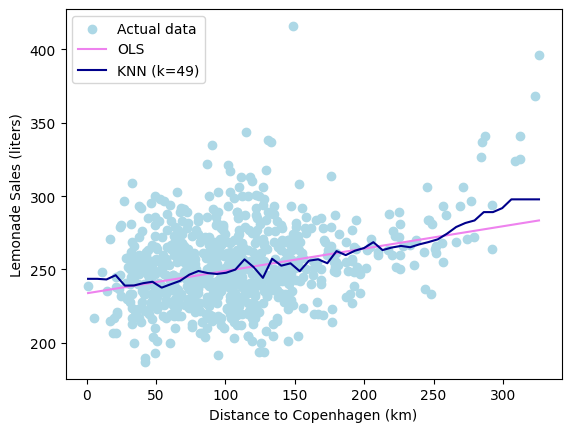

In [74]:
plt.scatter(X_test, y_test, color='lightblue', label='Actual data')

x_range = np.linspace(min(X_test), max(X_test))

y_pred_ols = ols_model.predict(x_range)
y_pred_knn = knn_model.predict(x_range)

plt.plot(x_range, y_pred_ols, color='violet', label='OLS')
plt.plot(x_range, y_pred_knn, color='darkblue', label='KNN (k=49)')

plt.xlabel('Distance to Copenhagen (km)')
plt.ylabel('Lemonade Sales (liters)')
plt.legend()
plt.show()

Step 9: Analyzing the plot: The OLS model assumes a linear relationship between distance and lemonade sales which results in a straight line. In contrast, the KNN model with k=49 follows more the actual structure of the data, which is resulting in a more flexibel curve. The plot also shows that the realtionship between the kilometers and liters is noisy (random fluctuations that doesn't follow a pattern) rather than systematically linear. The KNN model is more sensitive to this noise and capture it more than the OLS model. The goal of machine learning model is to capture the underlying relationship or pattern in the data while minimizing the influence of noise. The OLS model fits this requirement better than the KNN. But for this in contrast, the KNN model adapts easier to the fast increasing values after 280 kilometers as it doesn't follow a linear structure. 

Step 10: Regarding the share of a distance lager than 180 kilometers the plot shows only a few datapoints with more than 180 km but for this datapoints the sales of liters are incredibly increasing. The relationship between the higher sales with more than 280 kilometers might not necessarily based on the kilometers but more on other factors (e.g. special events or festivals). Adding more variables could identify and capture this investigation and improve the models performance. 

### Part 1C

Based on the discussion in 1B, where we identified that neither the KNN nor the OLS model are optimal for the prediction of lemonade sales based on only kilometers, we could combine both models with an ensemble learning approch.

### Part 1D